# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio



Como primeira etapa do CRISP-DM, vamos entender do que se trata o negócio, e quais os objetivos.



## Etapa 2 Crisp-DM: Entendimento dos dados
A segunda etapa é o entendimento dos dados. Foram fornecidas 15 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela.


### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:




| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  ESCREVER AQUI                                      | ESCREVER AQUI|
| id_cliente              |  ESCREVER AQUI                                      | ESCREVER AQUI|
| sexo                    |  ESCREVER AQUI                                      | ESCREVER AQUI|
| posse_de_veiculo        |  ESCREVER AQUI                                      | ESCREVER AQUI|
| posse_de_imovel         |  ESCREVER AQUI                                      | ESCREVER AQUI|
| qtd_filhos              |  ESCREVER AQUI                                      | ESCREVER AQUI|
| tipo_renda              |  ESCREVER AQUI                                      | ESCREVER AQUI|
| educacao                |  ESCREVER AQUI                                      | ESCREVER AQUI|
| estado_civil            |  ESCREVER AQUI                                      | ESCREVER AQUI|
| tipo_residencia         |  ESCREVER AQUI                                      | ESCREVER AQUI|
| idade                   |  ESCREVER AQUI                                      | ESCREVER AQUI|
| tempo_emprego           |  ESCREVER AQUI                                      | ESCREVER AQUI|
| qt_pessoas_residencia   |  ESCREVER AQUI                                      | ESCREVER AQUI|
| renda                   |  ESCREVER AQUI                                      | ESCREVER AQUI|





In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

In [143]:
#renda = "previsao_de_renda.csv"

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [144]:
import pandas as pd

# Especifique o caminho para o seu arquivo CSV
file_path = "previsao_de_renda.csv"

# Use a função read_csv do pandas para carregar o arquivo CSV em um DataFrame
df = pd.read_csv(file_path)

In [168]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [169]:
renda.head(25)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
5,5,2015-01-01,10581,F,False,True,0,Assalariado,Superior completo,Casado,Casa,39,4.345205,2.0,1445.87
6,6,2015-01-01,7129,F,False,True,0,Empresário,Superior completo,Viúvo,Casa,55,6.378082,1.0,1726.03
7,7,2015-01-01,9952,F,False,True,0,Empresário,Secundário,Casado,Casa,36,3.104110,2.0,2515.98
8,8,2015-01-01,883,F,False,True,0,Assalariado,Secundário,Casado,Casa,50,18.605479,2.0,3420.34
9,9,2015-01-01,8070,M,True,True,0,Assalariado,Superior completo,Casado,Casa,60,10.558904,2.0,12939.14


In [170]:
metadata = pd.DataFrame(renda.dtypes, columns = ['tipo'])
metadata['n_categorias'] = 0
for var in metadata.index:
    metadata.loc[var, 'n_categorias'] = len(renda.groupby([var]).size())
metadata

,tipo,n_categorias
Unnamed: 0,int64,15000
data_ref,object,15
id_cliente,int64,9845
sexo,object,2
posse_de_veiculo,bool,2
posse_de_imovel,bool,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [172]:
from pandas_profiling import ProfileReport

prof = ProfileReport(renda, explorative=True, minimal=True)
prof.to_file("analise.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 70.93it/s]


In [173]:
prof.to_file('./output/previsao_de_renda.csv')

/usr/local/lib/python3.10/dist-packages/pandas_profiling/profile_report.py:314: UserWarning: Extension .csv not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 222.77it/s]


### Entendimento dos dados - Bivariadas




In [174]:
renda['data_ref'] = pd.to_datetime(renda['data_ref'])

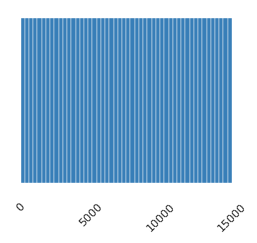

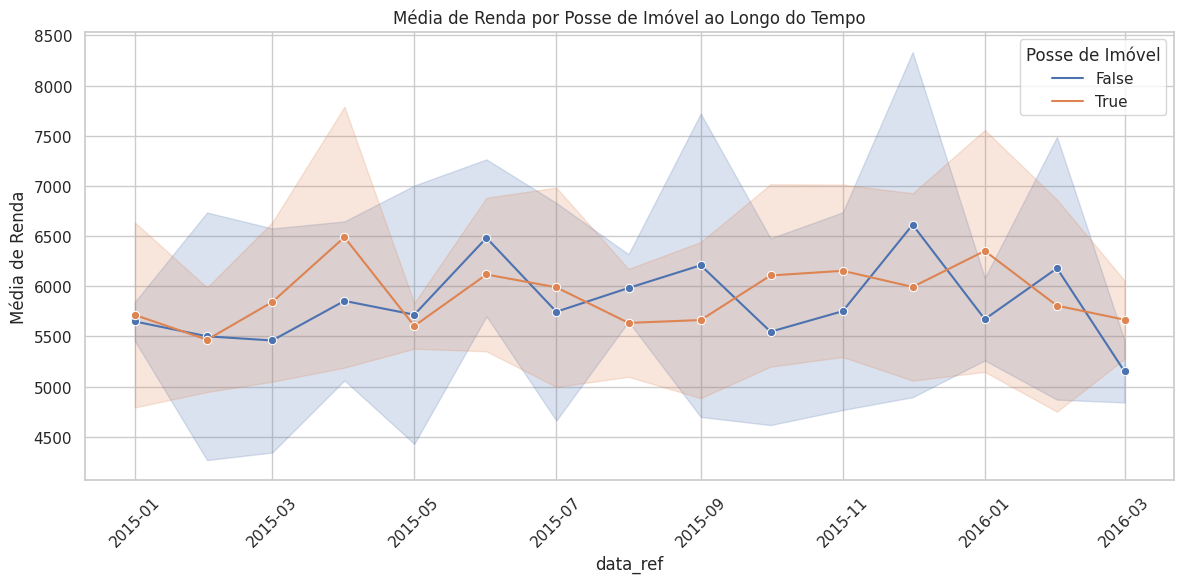

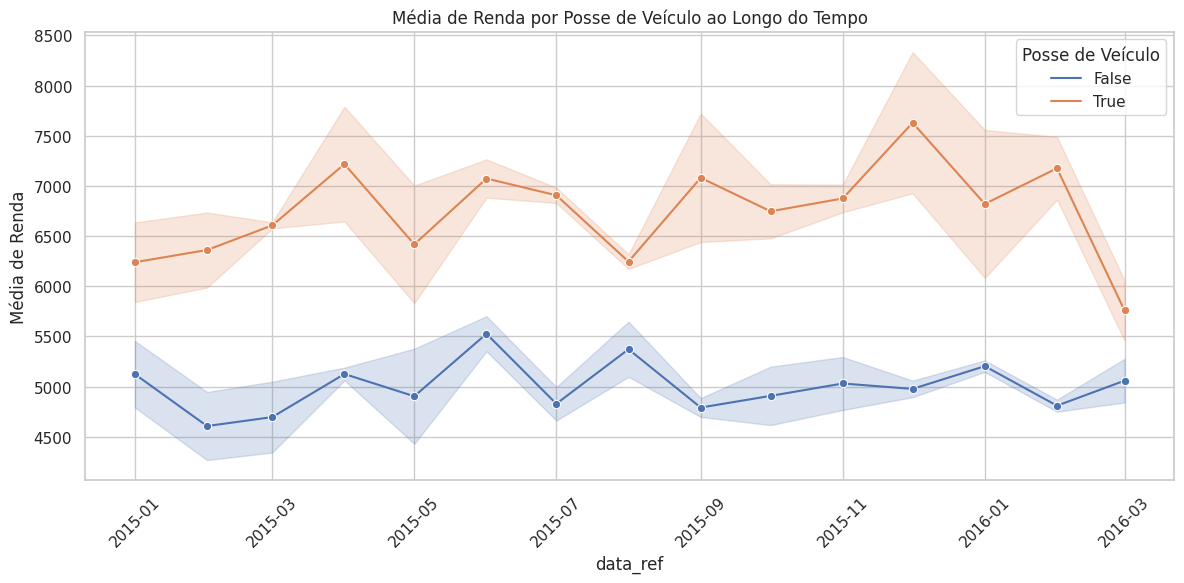

In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV em um DataFrame
df = pd.read_csv('previsao_de_renda.csv')

# Remover a coluna 'index', se estiver presente (caso ela seja um identificador sequencial)
df = df.drop(columns=['index'], errors='ignore')

# Converter a coluna 'data' para o formato de data
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Calcular as médias de renda para cada categoria de 'posse de imóvel' e 'posse de veículo' em cada período
mean_data = df.groupby(['data_ref', 'posse_de_imovel', 'posse_de_veiculo'])['renda'].mean().reset_index()

# Criar o gráfico de linha
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_data, x='data_ref', y='renda', hue='posse_de_imovel', marker='o')
plt.title("Média de Renda por Posse de Imóvel ao Longo do Tempo")
plt.xlabel("data_ref")
plt.ylabel("Média de Renda")
plt.legend(title="Posse de Imóvel")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_data, x='data_ref', y='renda', hue='posse_de_veiculo', marker='o')
plt.title("Média de Renda por Posse de Veículo ao Longo do Tempo")
plt.xlabel("data_ref")
plt.ylabel("Média de Renda")
plt.legend(title="Posse de Veículo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [176]:
#variável tipo de renda

ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='tipo_renda',
    dodge=True,
    errorbar=('ci', 95) 
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.10), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime('%m-%Y')).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.1,1), loc=2, borderaxespad=0.)

In [177]:
#variável sexo por renda

ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='sexo',
    dodge=True,
    errorbar=('ci', 95) 
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.10), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime('%m-%Y')).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.1,1), loc=2, borderaxespad=0.)

In [178]:
#variável posse de veículo por renda

ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='posse_de_veiculo',
    dodge=True,
    errorbar=('ci', 95) 
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.10), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime('%m-%Y')).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.1,1), loc=2, borderaxespad=0.)

In [179]:
#variável educação

ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='educacao',
    dodge=True,
    errorbar=('ci', 95) )


plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.10), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime('%m-%Y')).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.1,1), loc=2, borderaxespad=0.)

In [180]:
#variável tipo de residencia

ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='tipo_residencia',
    dodge=True,
    errorbar=('ci', 95) 
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.10), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime('%m-%Y')).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.1,1), loc=2, borderaxespad=0.)

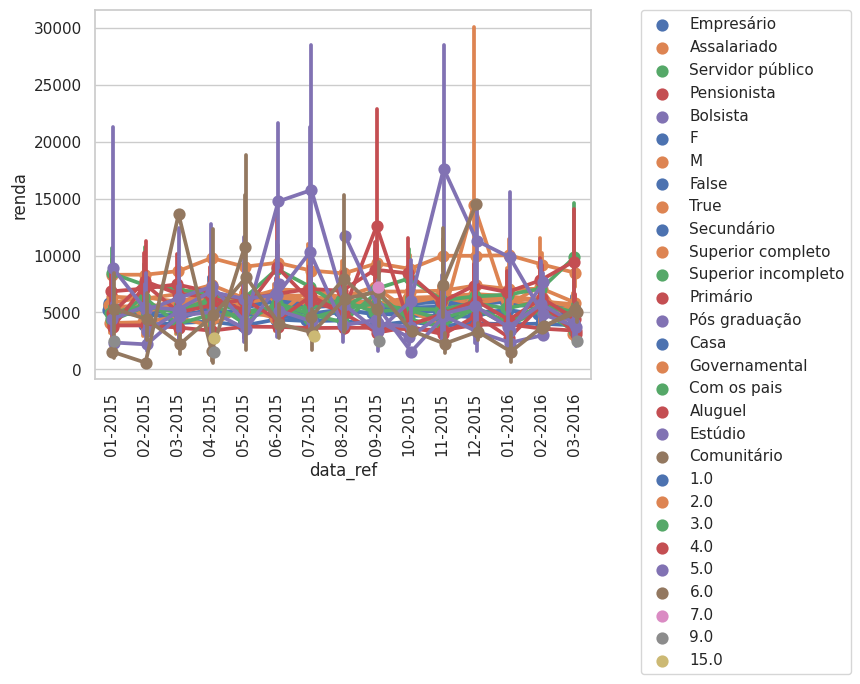

In [181]:
#variável quantidade de pessoas na residência

ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='qt_pessoas_residencia',
    dodge=True,
    errorbar=('ci', 95)
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.10), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime('%m-%Y')).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.1,1), loc=2, borderaxespad=0.)
plt.show() 

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [158]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             15000 non-null  int64         
 1   data_ref               15000 non-null  datetime64[ns]
 2   id_cliente             15000 non-null  int64         
 3   sexo                   15000 non-null  object        
 4   posse_de_veiculo       15000 non-null  bool          
 5   posse_de_imovel        15000 non-null  bool          
 6   qtd_filhos             15000 non-null  int64         
 7   tipo_renda             15000 non-null  object        
 8   educacao               15000 non-null  object        
 9   estado_civil           15000 non-null  object        
 10  tipo_residencia        15000 non-null  object        
 11  idade                  15000 non-null  int64         
 12  tempo_emprego          12427 non-null  float64       
 13  q

In [159]:
renda = renda.drop(['Unnamed: 0', 'data_ref', 'id_cliente', 'tempo_emprego'], axis=1)

In [160]:
renda.isnull().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [161]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   15000 non-null  object 
 1   posse_de_veiculo       15000 non-null  bool   
 2   posse_de_imovel        15000 non-null  bool   
 3   qtd_filhos             15000 non-null  int64  
 4   tipo_renda             15000 non-null  object 
 5   educacao               15000 non-null  object 
 6   estado_civil           15000 non-null  object 
 7   tipo_residencia        15000 non-null  object 
 8   idade                  15000 non-null  int64  
 9   qt_pessoas_residencia  15000 non-null  float64
 10  renda                  15000 non-null  float64
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 1.1+ MB


In [162]:
#tratamento de duplicadas

renda = renda.drop_duplicates()
renda = renda.reset_index(drop=True)
print(renda.shape)
print(renda.shape)
print(renda.info())

(10447, 11)
(10447, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10447 entries, 0 to 10446
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   10447 non-null  object 
 1   posse_de_veiculo       10447 non-null  bool   
 2   posse_de_imovel        10447 non-null  bool   
 3   qtd_filhos             10447 non-null  int64  
 4   tipo_renda             10447 non-null  object 
 5   educacao               10447 non-null  object 
 6   estado_civil           10447 non-null  object 
 7   tipo_residencia        10447 non-null  object 
 8   idade                  10447 non-null  int64  
 9   qt_pessoas_residencia  10447 non-null  float64
 10  renda                  10447 non-null  float64
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 755.1+ KB
None


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Rodando o modelo


In [163]:
renda = pd.get_dummies(renda, columns=['qtd_filhos', 'idade'],drop_first= True).copy()
renda.dtypes

sexo                object
posse_de_veiculo      bool
posse_de_imovel       bool
tipo_renda          object
educacao            object
                     ...  
idade_64              bool
idade_65              bool
idade_66              bool
idade_67              bool
idade_68              bool
Length: 62, dtype: object

In [164]:
X = renda.drop(['tipo_renda'], axis=1).copy()
y = renda['tipo_renda']

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= True)

In [ ]:

reg1 = DecisionTreeRegressor(max_depth=4)
reg2 = DecisionTreeRegressor(max_depth=8)

reg1.fit(X_test, y_test)
reg2.fit(X_test, y_test)

In [ ]:

mse1 = reg1.score(X_test, y_test)
mse2 = reg2.score(X_test, y_test)

template = 'O R-quadrado da árvore com profundidade {0} é: {1:.2f}'

print(template.format(reg1.get_depth(),mse1).replace('.',','))

In [ ]:
plt.rc('figure', figsize=(30, 30))
tp = tree.plot_tree(reg2,
                   feature_names=X_test.columns,
                   filled=True)

In [ ]:
#pré poda

reg2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=20)
reg2.fit(X_train, y_train)
mse1 = reg2.score(X_test, y_test)
mse1

In [ ]:
mses = []
ind_i = []
ind_j = []

for i in range(1, 9):
    for j in range(1, 9):
        reg2 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        reg2.fit(X_train, y_train)
        mse1 = reg2.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses': mses, 'profundidade': ind_i, 'n_minimo': ind_j})
sns.heatmap(df_mse.pivot(index='profundidade',
            columns='n_minimo', values='mses'))

## Etapa 5 Crisp-DM: Avaliação dos resultados


In [ ]:
print(f'R-quadrado de treino é: {reg2.score(X_train, y_train)*100:.2f}%')

In [ ]:
print(f'R-quadrado de teste é: {reg2.score(X_test, y_test)*100:.2f}%')

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.